In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Part 1)

In [5]:
# Specifying the inputs to mean-variance analysis
E = np.array([[0.1149], [0.0571]])
Omega = np.array([[0.1847 ** 2, -0.0002], [-0.0002, 0.0962 ** 2]])

print(f"E' = {E.flatten()}")
print(f"Omega = {Omega}")

E' = [0.1149 0.0571]
Omega = [[ 0.03411409 -0.0002    ]
 [-0.0002      0.00925444]]


## Part 2-a)

In [7]:
# Computing the composition of the GMV portfolio. Report its mean and std.
w_G = np.linalg.inv(Omega) @ np.ones((2, 1)) / (np.ones((1, 2)) @ np.linalg.inv(Omega) @ np.ones((2, 1)))
E_G = float(w_G.T @ E)
sigma_G = float(np.sqrt(w_G.T @ Omega @ w_G))

print('GMV portfolio')
print(f"weights   {w_G.flatten()[0]:10.4f} {w_G.flatten()[1]:10.4f}")
print(f"mean      {E_G*100:10.2f}")
print(f"std       {sigma_G*100:10.2f}")

GMV portfolio
weights       0.2160     0.7840
mean            6.96
std             8.49


## Part 2-b)

In [ ]:
# Computing the composition of the Zero Tangency portfolio (tangent to rf=0). Report its mean and std.

w_T0 = np.linalg.inv(Omega) @ E / (np.ones((1, 2)) @ np.linalg.inv(Omega) @ E)
E_T0 = float(w_T0.T @ E)
sigma_T0 = float(np.sqrt(w_T0.T @ Omega @ w_T0))

print('Zero Tangency portfolio')
print(f"weights   {w_T0.flatten()[0]:10.4f} {w_T0.flatten()[1]:10.4f}")
print(f"mean      {E_T0*100:10.2f}")
print(f"std       {sigma_T0*100:10.2f}")

Zero Tangency portfolio
weights       0.3529     0.6471
mean            7.75
std             8.96


## Part 2-c)

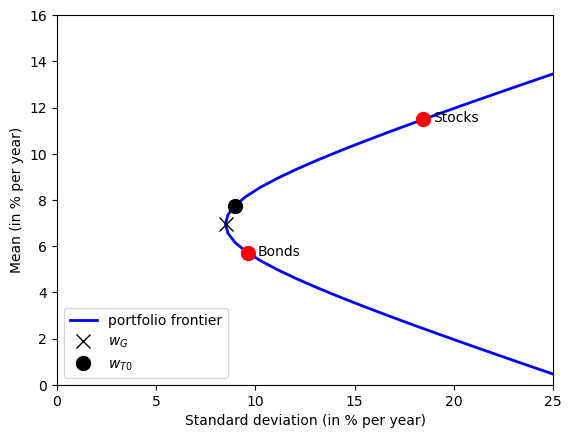

In [ ]:
# Compute portfolios of w_G and w_T0 for varying weights.

alpha = np.arange(-10, 10, 0.5)  # array of weights "alpha"
omalpha = np.ones_like(alpha) - alpha # corresponding "1-alpha"
w_X = np.outer(alpha, w_T0) + np.outer(omalpha, w_G)  # portfolios of w_G and w_T0
E_X = w_X @ E  # expected returns
var_X = np.diag(w_X @ Omega @ w_X.T)  # variances of portfolio returns

asset_coordinates = np.sqrt(np.diag(Omega)) * 100 
asset_returns = E * 100 

# Plotting the efficient frontier and assets
plt.figure()

h1=plt.plot(np.sqrt(var_X) * 100 , E_X * 100 , '-b', linewidth=2)  # Efficient portfolios

plt.plot(asset_coordinates, asset_returns, '.r', markersize=20)  # Original assets
for i, txt in enumerate(['Stocks', 'Bonds']):
    plt.text(asset_coordinates[i] + 0.5, asset_returns[i] - 0.1, txt)

h2=plt.plot(sigma_T0 * 100 , E_T0 * 100 , 'ok', markersize=10)  # Zero Tangency portfolio
h3=plt.plot(sigma_G * 100 , E_G * 100 , 'xk', markersize=10)  # GMV portfolio

plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.axis([0, 25, 0, 16])

plt.legend([h1[0], h3[0], h2[0]], ['portfolio frontier',r'$w_{G}$', r'$w_{T0}$'], loc='lower left')

plt.show()

## Part 2-d)

In [ ]:
# Weights, expected return, and variance of the portfolio that is equally weighted in two portfolios:
# GMV and Zero Tangency.

w_eq = 0.5 * w_G + 0.5 * w_T0
E_eq = float(w_eq.T @ E)
var_eq = float(w_eq.T @ Omega @ w_eq)


print('Equally weighted portfolio')
print(f"weights   {w_eq.flatten()[0]:10.4f} {w_eq.flatten()[1]:10.4f}")
print(f"mean      {E_eq*100:10.2f}")
print(f"std       {np.sqrt(var_eq)*100:10.2f}")

Equally weighted portfolio
weights       0.2844     0.7156
mean            7.35
std             8.61


**Comment** Any portfolio of frontier portfolios is a frontier portfolio. Since it has expected return greater than the minimum variance portfolio, it is on the efficient frontier.

This portfolio is efficient because it is a combination of two portfolios on the efficient frontier: the Global Minimum Variance (GMV) portfolio and the Zero Tangency portfolio. Since it is constructed as a blend of these two, the resulting portfolio falls on the efficient frontier segment between the GMV and the Zero Tangency portfolio. Consequently, its expected return and standard deviation are intermediate, lying between the corresponding values of the GMV and Zero Tangency portfolios (as visible on the graph below).

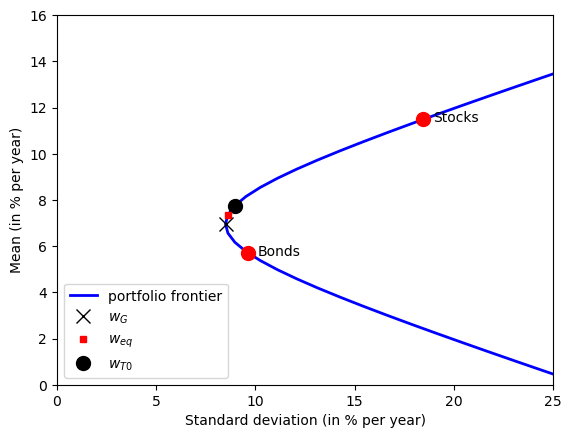

In [16]:
# Plotting the efficient frontier and assets
plt.figure()

h1=plt.plot(np.sqrt(var_X) * 100 , E_X * 100 , '-b', linewidth=2)  # Efficient portfolios

plt.plot(asset_coordinates, asset_returns, '.r', markersize=20)  # Original assets
for i, txt in enumerate(['Stocks', 'Bonds']):
    plt.text(asset_coordinates[i] + 0.5, asset_returns[i] - 0.1, txt)

h2=plt.plot(sigma_T0 * 100 , E_T0 * 100 , 'ok', markersize=10)  # Zero Tangency portfolio
h3=plt.plot(sigma_G * 100 , E_G * 100 , 'xk', markersize=10)  # GMV portfolio
h4=plt.plot(np.sqrt(var_eq) * 100 , E_eq * 100 , 'sr', markersize=4)  # Equally-Weighted Portfolio

plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.axis([0, 25, 0, 16])

plt.legend([h1[0], h3[0], h4[0], h2[0]], ['portfolio frontier',r'$w_{G}$', r'$w_{eq}$', r'$w_{T0}$'], loc='lower left')

plt.show()

## Part 3-a,b)

In [18]:
# Optimal asset allocation

# Optimal portfolio with gamma=2
gamma = 2
alpha1 = float(E.T @ np.linalg.inv(Omega) @ np.ones((2, 1))) / gamma
w_1 = alpha1 * w_T0 + (1 - alpha1) * w_G
E_1 = float(w_1.T @ E)
var_1 = float(w_1.T @ Omega @ w_1)

# Optimal portfolio with gamma=4
#FILL IN THE FORMULAS
gamma = 4
alpha2 = float(E.T @ np.linalg.inv(Omega) @ np.ones((2, 1))) / gamma
w_2 = alpha2 * w_T0 + (1 - alpha2) * w_G
E_2 = float(w_2.T @ E)
var_2 =float(w_2.T @ Omega @ w_2)

print('Investor with gamma=2')
print(f"weights   {w_1.flatten()[0]:10.4f} {w_1.flatten()[1]:10.4f}")
print(f'mean      {E_1 * 100: 10.2f}')
print(f'sigma       {np.sqrt(var_1) * 100: 10.2f}')

print('Investor with gamma=4')
print(f"weights   {w_2.flatten()[0]:10.4f} {w_2.flatten()[1]:10.4f}")
print(f'mean      {E_2 * 100: 10.2f}')
print(f'sigma       {np.sqrt(var_2) * 100: 10.2f}')

Investor with gamma=2
weights       0.8763     0.1237
mean           10.78
sigma            16.22
Investor with gamma=4
weights       0.5462     0.4538
mean            8.87
sigma            10.95


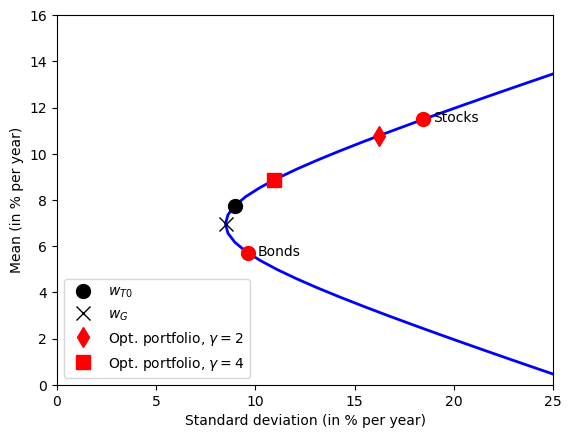

In [19]:
# Plotting the frontier and assets including optimal portfolios
plt.figure()

plt.plot(np.sqrt(var_X) * 100 , E_X * 100 , '-b', linewidth=2)  # MV portfolios

plt.plot(asset_coordinates, asset_returns, '.r', markersize=20)  # Original assets
for i, txt in enumerate(['Stocks', 'Bonds']):
    plt.text(asset_coordinates[i] + 0.5, asset_returns[i] - 0.1, txt)

# Zero Tangency portfolio
sigma_T0 = np.sqrt(float(w_T0.T @ Omega @ w_T0))
E_T0 = float(w_T0.T @ E)
plt.plot(sigma_T0 * 100 * np.sqrt(1), E_T0 * 100 * 1, 'ok', markersize=10, label=r'$w_{T0}$')

# GMV portfolio
sigma_G = np.sqrt(float(w_G.T @ Omega @ w_G))
E_G = float(w_G.T @ E)
plt.plot(sigma_G * 100 , E_G * 100 , 'xk', markersize=10, label=r'$w_{G}$')

# Optimal portfolios
plt.plot(np.sqrt(var_1) * 100, E_1 * 100 * 1, 'dr', markersize=10, label='Opt. portfolio, $\gamma=2$')
plt.plot(np.sqrt(var_2) * 100, E_2 * 100, 'sr', markersize=10, label='Opt. portfolio, $\gamma=4$')


plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.axis([0, 25, 0, 16])


plt.legend(loc='lower left')
plt.show()

#plt.savefig('allocation.png')

Both portfolios are efficient because they lie on the efficient frontier. We compute the portfolios using the following formulas:

        w = Alpha * w_T0 + (1 - Alpha) * w_G
        Alpha = (Matrix of ones * Omega^(-1) * E) / Gamma,
where w_T0 and w_G have already been computed in the parts a) and b).  We use these precise formulas because we do not have an access to a Risk-Free asset, and thus the Efficient Frontier is a hyperbola (visible on the graph above). 

The first portfolio, with a risk aversion coefficient of γ=2, has a higher expected return and a higher standard deviation. This aligns with the investor's lower risk aversion (γ=2) as they are willing to accept greater risk for the potential of higher returns.

The second portfolio, with γ=4, also lies on the efficient frontier but has a lower expected return and a lower standard deviation. This reflects the investor's higher risk aversion (γ=4), as they prioritize minimizing risk even if it comes at the cost of lower returns.

# Problem B

## Part 1)

In [23]:
# Specify the risk-free rate rf and compute the expected excess returns Ee.
rf = 0.03  # risk-free rate
Ee = E - np.ones_like(E)*rf # excess expected returns

# Compute and plot the Tangency portfolio: weights, expected return, standard deviation and Sharpe ratio
#FILL IN THE FORMULAS

w_T =  np.linalg.inv(Omega) @ Ee / (np.ones((1, 2)) @ np.linalg.inv(Omega) @ Ee)# weights of tangency portfolio
E_T =  float(w_T.T @ E) # expected return of T
sigma_T =  float(np.sqrt(w_T.T @ Omega @ w_T)) # standard deviation of T
SR_T =  (E_T - rf) / sigma_T # Sharpe Ratio of T


print('Tangency portfolio')
print(f"weights   {w_T.flatten()[0]:10.4f} {w_T.flatten()[1]:10.4f}")
print(f'mean      {E_T * 100: 10.2f}')
print(f'sigma     {sigma_T * 100: 10.2f}')
print(f'Max SR    {SR_T: 10.2f}')

Tangency portfolio
weights       0.4566     0.5434
mean            8.35
sigma           9.87
Max SR          0.54


## Part 2)

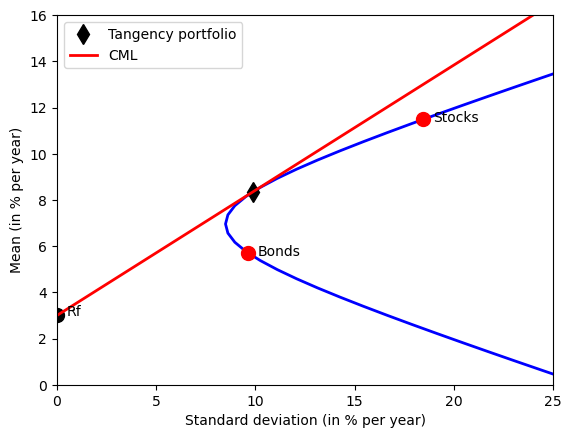

In [25]:
# Create a plot of the Capital Market Line (CML)
# Generating x values
x = np.arange(0, 35.1, 0.1)
L = len(x)
CML = rf *  100 * np.ones(L) + SR_T * x

plt.figure()

plt.plot(np.sqrt(var_X) * 100 , E_X * 100 , '-b', linewidth=2)  # MV portfolios

plt.plot(asset_coordinates, asset_returns, '.r', markersize=20)  # Original assets
for i, txt in enumerate(['Stocks', 'Bonds']):
    plt.text(asset_coordinates[i] + 0.5, asset_returns[i] - 0.1, txt)
    
    
plt.plot(sigma_T * 100, E_T * 100, 'dk', markersize=10, label='Tangency portfolio')

  
plt.text(0 + 0.5, rf * 100, 'Rf')
plt.plot(0,rf * 100, 'ok', markersize=10)

plt.xlabel('Standard deviation (in % per year)')
plt.ylabel('Mean (in % per year)')
plt.axis([0, 25, 0, 16])
plt.plot(x, CML, '-r', linewidth=2, label='CML')
# plt.savefig('CML.png')
plt.legend(loc='upper left')

plt.show()


## Part 3)

It would never be efficient to short-sell one of the two risky assets because, when a risk-free asset exists, the efficient frontier coincides with the CML. Efficient portfolios combine the risk-free asset and the tangency portfolio, which has positive weights for both risky assets. Therefore a portfolio including a short position in one of the two risky assets will not lie on the CML and will not be efficient. 

## Part 4) 

 The portfolio described is not efficient. For a portfolio to be efficient, it must lie on the Capital Market Line (CML). While the efficient portfolio for the client could include a 50% allocation to the risk-free asset, the remaining 50% would need to be invested in the tangency portfolio. In the described portfolio, stocks make up 60% of the risky portion (30% * 2), while bonds account for 40%. These weights differ from those of the tangency portfolio calculated earlier. Therefore, the portfolio is not efficient.

Additionally, we can see this from the results of the logical check below, which verifies whether the Expected Returns of the given portfolio would be equal to the Returns predicted by the CML for the expected level of volatility of the portfolio. The check provides us with one more proof that this portfolio in not efficient.

In [28]:
#Introducing Risk-Free asset to our matrices

w_4 = np.array([[0.3], [0.2], [0.5]])

import numpy as np

# Example shape of E (update as needed if it's 100, 1)
E = np.array([[0.1149], [0.0571]])  # This is (2, 1), you can change this to match your use case
Omega = np.array([[0.1847**2, -0.0002], [-0.0002, 0.0962**2]])

# Risk-free asset parameters
rf = 0.03  # Risk-free return
risk_free_variance = 0
risk_free_covariance = [0, 0]

# Check the shape of E
print(f"Original E shape: {E.shape}")

# Ensure E is the right shape (e.g., (n, 1))
if E.shape[1] != 1:
    raise ValueError(f"Expected E to have shape (n, 1), but got {E.shape}")

# Add risk-free asset to E (extend it)
E_with_rf = np.vstack([E, np.array([[rf]])])

# Add risk-free asset to Omega (expand the matrix)
rf_row = np.array([*risk_free_covariance, risk_free_variance])
rf_col = np.array([[0], [0], [risk_free_variance]])
Omega_with_rf = np.vstack([np.hstack([Omega, rf_col[:-1]]), rf_row])

# Display updated matrices
print("\nUpdated E Matrix:")
print(E_with_rf)

print("\nUpdated Omega Matrix:")
print(Omega_with_rf)

print("\nNew Weights Matrix:")
print(w_4)

#Computation of Variance and Expected Returns
var_4 = float(w_4.T @ Omega_with_rf @ w_4)
E_4 = float(w_4.T @ E_with_rf)

print("Variance of the proposed portfolio: ",var_4)
print("Return of the proposed portfolio: ",E_4)

Original E shape: (2, 1)

Updated E Matrix:
[[0.1149]
 [0.0571]
 [0.03  ]]

Updated Omega Matrix:
[[ 0.03411409 -0.0002      0.        ]
 [-0.0002      0.00925444  0.        ]
 [ 0.          0.          0.        ]]

New Weights Matrix:
[[0.3]
 [0.2]
 [0.5]]
Variance of the proposed portfolio:  0.0034164457
Return of the proposed portfolio:  0.06089


In [29]:
#Logical Check whether our Expected Returns are on the Efficient Frontier - here: the CML
CML_Orig = rf *  100  + SR_T * np.sqrt(var_4)
if CML_Orig == E_4:
    print("This proposed portfolio is efficient!")
else:
    print("NO! Not efficient!")

NO! Not efficient!


## Part 5) 

In [31]:
# In order to find the optimal portfolio we use the formula seen in class w* = (1/gamma) * (Et - rf)/(sigma2t) 
# and find the share that the investor should invest in the tangency portfolio.

gamma = 8
w_gamma8 = (1/gamma) * (E_T - rf)/ (sigma_T**2)
w_rf_gamma8 = 1 - w_gamma8

print(f"Share in the Tangency portfolio: {round(w_gamma8,4)}")
print(f"Share in the Risk-free portfolio: {round(w_rf_gamma8,4)}")

Share in the Tangency portfolio: 0.6861
Share in the Risk-free portfolio: 0.3139


In the case of the client, we would allocate 31.39% of the portfolio in the risk-free asset and 68.61% in the tangency portfolio. In fact, these weights correspond to the efficient portfolio that maximizes utility for an investor with gamma=8.

# Quantitative Asset Management
# Assignment 1
# Problem 3

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [35]:
#Load the data on Industries

data = pd.read_csv('Data_Industries.txt',  delim_whitespace=True) # Read the CSV file, assuming the delimiter is whitespace.
data['Year'] = pd.to_datetime(data['Year'], format='%Y') # Since the 'Year' column is already present, set it as the index.
data.set_index('Year', inplace=True)
data.index = pd.to_datetime(data.index, format='%Y')
data.index = data.index.year
data = data / 100 # Convert the returns from percentages to a decimal format by dividing by 100.

# Display the first few rows of the DataFrame to verify
data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Year,,,,,,,,,,
1927,0.2674,0.2264,0.3893,0.1108,0.4078,0.2581,0.2854,0.5654,0.4270,0.3734
1928,0.2675,0.5253,0.5235,0.4246,0.6958,0.2154,0.5018,0.3258,0.5822,0.3057
1929,-0.3731,-0.5549,-0.3208,-0.3127,-0.0845,0.0426,-0.4306,-0.1751,0.1823,-0.2202
1930,-0.2903,-0.4267,-0.4016,-0.4731,-0.4423,-0.0738,-0.4080,-0.1787,-0.2214,-0.3968
1931,-0.2840,-0.4269,-0.5024,-0.4679,-0.5087,-0.3671,-0.4095,-0.3721,-0.3902,-0.5303
...,...,...,...,...,...,...,...,...,...,...
2017,0.1256,0.1415,0.1800,-0.1254,0.2739,0.1465,0.0200,0.2549,0.1158,0.1446
2018,-0.0793,-0.2814,-0.2109,-0.3695,-0.0555,-0.1531,-0.1306,-0.2248,0.0301,-0.1364
2019,0.1568,0.2514,0.2181,-0.1800,0.3034,0.0632,0.1598,0.2596,0.2086,0.2637


In [36]:
# Load the data on risk-free rate
rf = pd.read_csv('Data_Riskfree.txt', delim_whitespace=True)
rf.rename(columns={'Risk': 'Risk Free Rate'}, inplace=True)
rf = rf[['Year', 'Risk Free Rate']]
rf.set_index('Year', inplace=True)
rf.index = pd.to_datetime(rf.index, format='%Y')
rf.index = rf.index.year
rf = rf/100


In [37]:
# Compute excess returns
rx = data.sub(rf['Risk Free Rate'], axis=0)
rx

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Year,,,,,,,,,,
1927,0.2362,0.1952,0.3581,0.0796,0.3766,0.2269,0.2542,0.5342,0.3958,0.3422
1928,0.2319,0.4897,0.4879,0.3890,0.6602,0.1798,0.4662,0.2902,0.5466,0.2701
1929,-0.4206,-0.6024,-0.3683,-0.3602,-0.1320,-0.0049,-0.4781,-0.2226,0.1348,-0.2677
1930,-0.3144,-0.4508,-0.4257,-0.4972,-0.4664,-0.0979,-0.4321,-0.2028,-0.2455,-0.4209
1931,-0.2947,-0.4376,-0.5131,-0.4786,-0.5194,-0.3778,-0.4202,-0.3828,-0.4009,-0.5410
...,...,...,...,...,...,...,...,...,...,...
2017,0.1176,0.1335,0.1720,-0.1334,0.2659,0.1385,0.0120,0.2469,0.1078,0.1366
2018,-0.0974,-0.2995,-0.2290,-0.3876,-0.0736,-0.1712,-0.1487,-0.2429,0.0120,-0.1545
2019,0.1354,0.2300,0.1967,-0.2014,0.2820,0.0418,0.1384,0.2382,0.1872,0.2423


## Part 1)

In [39]:
# Calculate the Sharpe Ratios
Ee_r = rx.mean() # Expected excess return vector
sigma_r = data.std() # Stdev vector
SR_r = Ee_r / sigma_r

# Display the calculated Sharpe Ratios
# First, format the Sharpe Ratios to two decimal places within the DataFrame creation step
df = pd.DataFrame(SR_r.apply(lambda x: f'{x:.2f}'), columns=['Sharpe Ratios'])
# Transpose the DataFrame to get industries as columns and their Sharpe Ratios as the row
transposed_df = df.T
# Now, the transposed DataFrame has industries as columns and one row of formatted Sharpe Ratios
# Use to_string for printing, which keeps the DataFrame format
print(transposed_df.to_string())



              NoDur Durbl Manuf Enrgy HiTec Telcm Shops  Hlth Utils Other
Sharpe Ratios  0.42  0.36  0.44  0.37  0.43  0.41  0.40  0.45  0.44  0.44


In [40]:
data100 = data*100
# Extracting mean and standard deviation for each column
E_vals = data100.mean()
sigma_vals = data100.std()

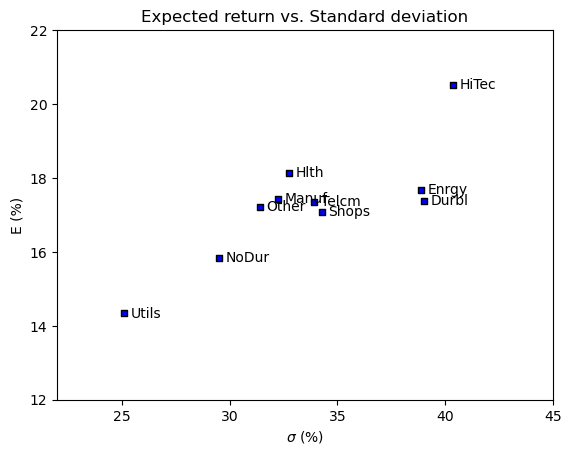

In [41]:
plt.figure()
plt.axis([22, 45, 12, 22])

plt.scatter(sigma_vals, E_vals, marker='s', facecolors='b', edgecolors='black', s=20)

for i, txt in enumerate(E_vals.index):
    plt.text(sigma_vals[i] + 0.3, E_vals[i], txt, ha='left', va='center')

plt.title('Expected return vs. Standard deviation')
plt.xlabel(r'$\sigma$ (%)')
plt.ylabel('E (%)')
plt.show()

## Parts 2-4)

In [ ]:
# Maximum Sharpe Ratio and the Tangency portfolio.
# Calculate covariance matrix Omega, expected return vector E, and expected excess return vector Ee.

Omega = data.cov().values
E = data.mean().values
Ee = rx.mean().values
print(Ee)
# Maximum Sharpe Ratio and CML
maxSR = np.sqrt(np.dot(Ee.T, np.linalg.inv(Omega)).dot(Ee))
print(f'maxSR: {maxSR:.4f}')

x = np.arange(0, 50, 0.1)
CML = rf['Risk Free Rate'].mean() * 100 + maxSR * x

[0.12527158 0.14073368 0.14137474 0.14365789 0.17219895 0.14054211
 0.13786947 0.14838211 0.11033684 0.13914421]
maxSR: 0.5937


In [44]:
# Calculation of Tangency portfolio T

#FILL IN BELOW
w_T = np.linalg.inv(Omega) @ Ee / (np.ones_like(Ee.T) @ np.linalg.inv(Omega) @ Ee)
E_T = w_T.T @ E
sigma_T = np.sqrt(w_T.T @ Omega @ w_T)


# Printing expexted return and stdev of T, and maxSR (Sharpe Ratio of T)
SR_T = float(np.sqrt(Ee.T @ np.linalg.inv(Omega) @ Ee))
print('Tangency portfolio')
print(f"weights   {w_T.flatten()[0]:10.4f} {w_T}")
print(f'mean      {E_T * 100: 10.2f}')
print(f'sigma     {sigma_T * 100: 10.2f}')
print(f'Max SR    {SR_T: 10.2f}')

# Example for specific industries ratio 



Tangency portfolio
weights       0.7134 [ 0.71337162 -0.59386525  0.38537312  0.07417894  0.15889178  0.07874376
 -0.26606764  0.24044174  0.40152196 -0.19259002]
mean           15.89
sigma          21.20
Max SR          0.59


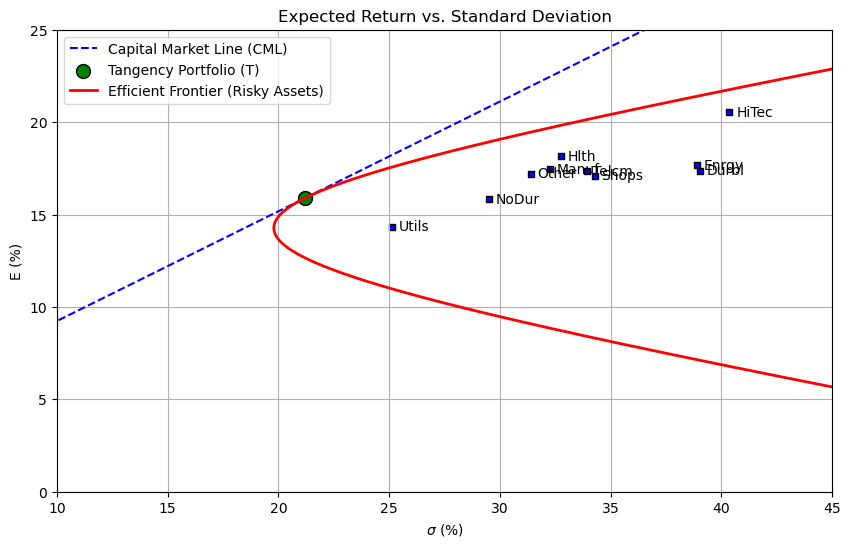

In [45]:
# Plotting the efficient frontier of the risky assets.
# Calculate w_G and w_T0 (Zero Tangency portfolio).
N = data.shape[1]
w_G = np.linalg.inv(Omega) @ np.ones_like(Ee) / (np.ones_like(Ee.T) @ np.linalg.inv(Omega) @ np.ones_like(Ee))
w_T0 = np.linalg.inv(Omega) @ E / (np.ones_like(E.T) @ np.linalg.inv(Omega) @ E)


# Plotting the efficient frontier of risky assets (generated by w_G and w_T0)
alpha_vals = np.linspace(-8, 8, 1000)

E_frontier = []
sigma_frontier = []

for alpha in alpha_vals:
    w = alpha * w_T + (1 - alpha) * w_G
    E_frontier.append(np.dot(w, E))  
    sigma_frontier.append(np.sqrt(np.dot(w.T, Omega).dot(w)))  
E_frontier = np.array(E_frontier)
sigma_frontier = np.array(sigma_frontier)

plt.figure(figsize=(10, 6))
plt.axis([10, 45, 0, 25])


plt.scatter(sigma_vals, E_vals, marker='s', facecolors='b', edgecolors='black', s=20)
for i, txt in enumerate(E_vals.index):
    plt.text(sigma_vals[i] + 0.3, E_vals[i], txt, ha='left', va='center')


plt.plot(x, CML, label='Capital Market Line (CML)', color='blue', linestyle='dashed')

plt.scatter(sigma_T *100, E_T *100, color='green', marker='o', s=100, label='Tangency Portfolio (T)', edgecolors='black')

plt.plot(sigma_frontier *100, E_frontier *100, label='Efficient Frontier (Risky Assets)', color='red', linestyle='solid', linewidth=2)

plt.title('Expected Return vs. Standard Deviation')
plt.xlabel(r'$\sigma$ (%)')
plt.ylabel('E (%)')
plt.legend()
plt.grid(True)

plt.show()

## Part 5)

In [47]:
(w_T[0]/w_T[2]).round(2)

1.85

 

The investor's Sharpe Ratio is going to be equal to the maximum Sharpe Ratio which is the Sharpe ratio of the tangency portfolio on the Capital Market Line (exact value: 0.59). As a matter of fact, a mean-variance investor with access to a risk-free asset will always allocate their portfolio along the Capital Market Line (CML).

As for the ratio of the portfolio weights the exact value of the ratio of the weight on NoDur to the weight on Manuf is equal to 1.85. What will change with the risk aversion coefficient, gamma, is the proportion of the wealth held in the tangency portfolio versus the risk-free asset, i.e. the amount of wealth allocated to the tangency portfolio will decrease as the gamma increases.


## Part 6)

In [50]:
# Optimal portfolio with no access to the risk-free asset, gamma = 4
gamma = 4
alpha = float(E.T @ np.linalg.inv(Omega) @ np.ones_like(E)) / gamma
w_1 = alpha * w_T0 + (1- alpha) * w_G
E_1 = float(w_1.T @ E)
var_1 = float(w_1.T @ Omega @ w_1)

print('Investor with gamma=4')
print(f"weights    {w_1}")
print(f'mean      {E_1 * 100: 10.2f}')
print(f'sigma       {np.sqrt(var_1) * 100: 10.2f}')

Investor with gamma=4
weights    [ 0.84094305 -0.56826402  0.3651653   0.07192925  0.10010588  0.09190423
 -0.31893847  0.22129483  0.4373605  -0.24150054]
mean           15.40
sigma            20.49


In [51]:
print(E)
print(Ee)


[0.15831053 0.17377263 0.17441368 0.17669684 0.20523789 0.17358105
 0.17090842 0.18142105 0.14337579 0.17218316]
[0.12527158 0.14073368 0.14137474 0.14365789 0.17219895 0.14054211
 0.13786947 0.14838211 0.11033684 0.13914421]


## Part 7)

In [53]:
# Target expected return mu = 15%, with access to risk-free asset
mu = 0.15
E_T = np.dot(w_T, E)  # Expected return of the tangency portfolio
risk_free = rf['Risk Free Rate'].mean()
# Scale tangency portfolio weights 
w_rf = (mu - E_T) / (risk_free - E_T) 

# weights
print("Portfolio Weight of Risk-Free Asset:", w_rf)

E_star_with_rf = (1-w_rf)*w_T
print(f'composition is: {E_star_with_rf}')

sigma_star_with_rf = (1-w_rf)*sigma_T
print(f"Expected Return: {mu:.4f}")
print(f'The Standard Deviation is: {sigma_star_with_rf:.2f}')
# Expected return and standard deviation
#E_star_with_rf = np.dot(w_with_rf, E)
#sigma_star_with_rf = np.sqrt(w_with_rf.T @ Omega @ w_with_rf)
#print(f"Expected Return: {E_star_with_rf:.4f}")
#print(f"Standard Deviation: {sigma_star_with_rf:.4f}")


Portfolio Weight of Risk-Free Asset: 0.07066151192466637
composition is: [ 0.6629637  -0.55190183  0.35814207  0.06893734  0.14766425  0.07317961
 -0.2472669   0.22345176  0.37314981 -0.17898131]
Expected Return: 0.1500
The Standard Deviation is: 0.20


## Part 8)


In [55]:
# Target expected return mu = 15%, with no acess to risk-free asset
mu = 0.15  # Target return
E_G = np.dot(w_G, E)       # Expected return of GMV portfolio
E_T0 = np.dot(w_T0, E)     # Expected return of zero-risk-free tangency portfolio

lambda_2 = (mu - E_G) / (E_T0 - E_G)
lambda_1 = 1 - lambda_2

# Combine portfolios to get the optimal weights
w_without_rf = lambda_1 * w_G + lambda_2 * w_T0

# weights
print("Portfolio Weights (Without Risk-Free Asset):", w_without_rf)

# Expected return and standard deviation
E_star_without_rf = np.dot(w_without_rf, E)
sigma_star_without_rf = np.sqrt(w_without_rf.T @ Omega @ w_without_rf)
print(f"Expected Return: {E_star_without_rf:.4f}")
print(f"Standard Deviation: {sigma_star_without_rf:.4f}")


Portfolio Weights (Without Risk-Free Asset): [ 0.9472435  -0.54693149  0.3483269   0.07005466  0.05112182  0.10287036
 -0.36299373  0.20534043  0.46722339 -0.28225583]
Expected Return: 0.1500
Standard Deviation: 0.2008


## Part 9)

In [ ]:
# Only 5 out of 10 industries available
# Extracting columns for 5 industries
r_5 = data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].values
N_5 = r_5.shape[1]
rx_5 = r_5 - np.outer(rf, np.ones(N_5))


Omega_5 = data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].cov().values
E_5 = data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].mean().values
Ee_5 = E_5 - rf['Risk Free Rate'].mean()

maxSR_5 = np.sqrt(Ee_5.T @ np.linalg.inv(Omega_5) @ Ee_5)

E_new_5 = E[:5]
Omega_new_5 = Omega[:5, :5]
One_5 = np.ones((5,1), dtype = int)
w_MVE_new_5 = np.linalg.inv(Omega_new_5) @ E_new_5 / (One_5.T @ np.linalg.inv(Omega_new_5) @ E_new_5)
w_GMW_new_5 = 1 / (One_5.T @ np.linalg.inv(Omega_new_5) @ One_5) * np.linalg.inv(Omega_new_5) @ One_5
alpha_5 = np.arange(-10, 10, 0.01)
maxsharpe_new_5 = float(np.sqrt(E_new_5.T @ np.linalg.inv(Omega_new_5) @ E_new_5))

print(f"The Maximun Sharpe Ratio with 5 industies is (without Risk Free asset) : {maxsharpe_new_5:.4f}")

E_new_10 = E[:10]
Omega_new_10 = Omega[:10, :10]
One_10 = np.ones((10,1), dtype = int)
w_MVE_new_10 = np.linalg.inv(Omega_new_10) @ E_new_10 / (One_10.T @ np.linalg.inv(Omega_new_10) @ E_new_10)
w_GMW_new_10 = 1 / (One_10.T @ np.linalg.inv(Omega_new_10) @ One_10) * np.linalg.inv(Omega_new_10) @ One_10
alpha_10 = np.arange(-10, 10, 0.01)
maxsharpe_new_10 = float(np.sqrt(E_new_10.T @ np.linalg.inv(Omega_new_10) @ E_new_10))

print(f"The Maximun Sharpe Ratio with 10 industies (without Risk Free asset) : {maxsharpe_new_10:.4f}")

print('\n5 out of 10 industries, with Risk Free asset')
print(f'Max Sharpe Ratio   {maxSR_5 : 10.2f}')

print('10 out of 10 industries with Risk Free asset')
print(f'Max Sharpe Ratio   {SR_T : 10.2f}')

The Maximun Sharpe Ratio with 5 industies is (without Risk Free asset) : 0.6258
The Maximun Sharpe Ratio with 10 industies (without Risk Free asset) : 0.7519

5 out of 10 industries, with Risk Free asset
Max Sharpe Ratio         0.51
10 out of 10 industries with Risk Free asset
Max Sharpe Ratio         0.59


**Comments**

In this case, we obtain that the Sharpe Ratio (SR) of the portfolio with 5 industries should be lower than that of a portfolio with all 10 industries. It is because with the greater number of assets in our portfolio (not perfectly correlated with one another) we should be able to obtain the same returns with lower risk (represented by the Standard Deviation) due to diversification.


In [59]:
# Computing the risky efficient frontier for 5 industries

#FILL IN BELOW
w_G_5 = np.linalg.inv(Omega_5) @ np.ones_like(E_5) / (np.ones_like(E_5.T) @ np.linalg.inv(Omega_5) @ np.ones_like(E_5))
w_T0_5 = np.linalg.inv(Omega_5) @ E_5 / (np.ones_like(E_5.T) @ np.linalg.inv(Omega_5) @ E_5)

# Efficient frontier for all 10 industries
alpha_vals = np.linspace(-8, 8, 1000)
E_frontier_10 = []
sigma_frontier_10 = []

for alpha in alpha_vals:
    w = alpha * w_T0 + (1 - alpha) * w_G
    E_frontier_10.append(np.dot(w, E))  
    sigma_frontier_10.append(np.sqrt(np.dot(w.T, Omega).dot(w)))  

E_frontier_10 = np.array(E_frontier_10)
sigma_frontier_10 = np.array(sigma_frontier_10)

# Efficient frontier for 5 industries
E_frontier_5 = []
sigma_frontier_5 = []

for alpha in alpha_vals:
    w = alpha * w_T0_5 + (1 - alpha) * w_G_5
    E_frontier_5.append(np.dot(w, E_5))  
    sigma_frontier_5.append(np.sqrt(np.dot(w.T, Omega_5).dot(w)))  

E_frontier_5 = np.array(E_frontier_5)
sigma_frontier_5 = np.array(sigma_frontier_5)

x = np.linspace(0, 50, len(sigma_frontier_10))

# CML for 10 industries (with risk-free asset)
CML_10 = rf['Risk Free Rate'].mean() * 100 + maxSR * x

# CML for 5 industries (with risk-free asset)
CML_5 = rf['Risk Free Rate'].mean() * 100 + maxSR_5 * x

# "CML" for no access to risk-free asset begins at origin
CML_10_no_rf = maxsharpe_new_10 * x  # Sharpe ratio for tangency portfolio used
CML_5_no_rf = maxsharpe_new_5 * x  # Sharpe ratio for tangency portfolio (5 industries)

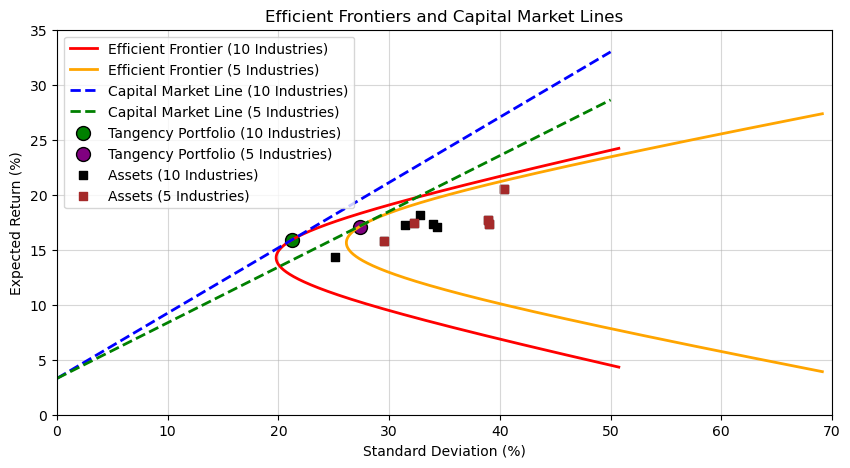

In [60]:
plt.figure(figsize=(10, 5))
plt.axis([0, 70, 0, 35])

# Plot efficient frontier for 10 industries
plt.plot(sigma_frontier_10 * 100, E_frontier_10 * 100, label='Efficient Frontier (10 Industries)', color='red', linewidth=2)

# Plot efficient frontier for 5 industries
plt.plot(sigma_frontier_5 * 100, E_frontier_5 * 100, label='Efficient Frontier (5 Industries)', color='orange', linewidth=2)

# Plot CML for 10 industries
plt.plot(x, CML_10, label='Capital Market Line (10 Industries)', color='blue', linestyle='dashed', linewidth=2)

# Plot CML for 5 industries
plt.plot(x, CML_5, label='Capital Market Line (5 Industries)', color='green', linestyle='dashed', linewidth=2)

# Highlight the tangency portfolios
plt.scatter(sigma_T * 100, E_T * 100, color='green', marker='o', s=100, label='Tangency Portfolio (10 Industries)', edgecolors='black')
plt.scatter(np.sqrt(w_T0_5.T @ Omega_5 @ w_T0_5) * 100, np.dot(w_T0_5, E_5) * 100, color='purple', marker='o', s=100, label='Tangency Portfolio (5 Industries)', edgecolors='black')

# Add scatter points for individual assets (optional)
plt.scatter(data.std() * 100, data.mean() * 100, label='Assets (10 Industries)', color='black', marker='s')
plt.scatter(data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].std() * 100, 
            data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].mean() * 100, 
            label='Assets (5 Industries)', color='brown', marker='s')

# Add labels and legend
plt.title('Efficient Frontiers and Capital Market Lines')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Expected Return (%)')
plt.legend()
plt.grid(alpha=0.5)

plt.show()


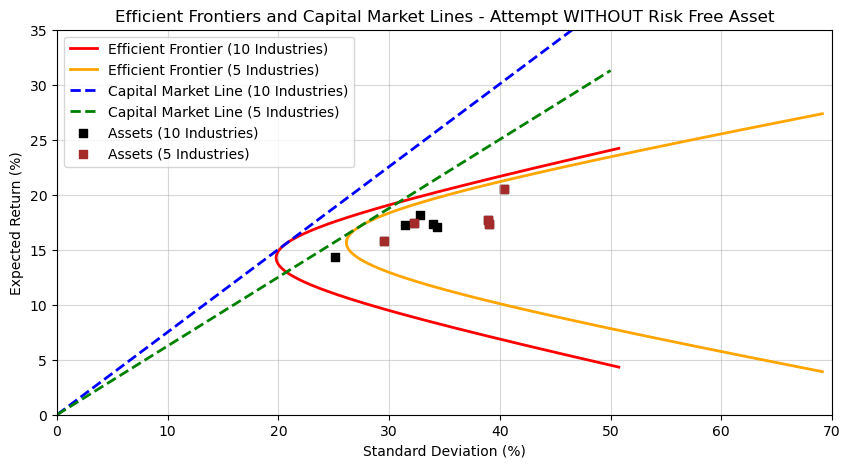

In [61]:
plt.figure(figsize=(10, 5))
plt.axis([0, 70, 0, 35])

# Plot efficient frontier for 10 industries
plt.plot(sigma_frontier_10 * 100, E_frontier_10 * 100, label='Efficient Frontier (10 Industries)', color='red', linewidth=2)

# Plot efficient frontier for 5 industries
plt.plot(sigma_frontier_5 * 100, E_frontier_5 * 100, label='Efficient Frontier (5 Industries)', color='orange', linewidth=2)

# Plot CML for 10 industries
plt.plot(x, CML_10_no_rf, label='Capital Market Line (10 Industries)', color='blue', linestyle='dashed', linewidth=2)

# Plot CML for 5 industries
plt.plot(x, CML_5_no_rf, label='Capital Market Line (5 Industries)', color='green', linestyle='dashed', linewidth=2)

# Add scatter points for individual assets (optional)
plt.scatter(data.std() * 100, data.mean() * 100, label='Assets (10 Industries)', color='black', marker='s')
plt.scatter(data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].std() * 100, 
            data[['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec']].mean() * 100, 
            label='Assets (5 Industries)', color='brown', marker='s')

# Add labels and legend
plt.title('Efficient Frontiers and Capital Market Lines - Attempt WITHOUT Risk Free Asset')
plt.xlabel('Standard Deviation (%)')
plt.ylabel('Expected Return (%)')
plt.legend()
plt.grid(alpha=0.5)

plt.show()


## Part 10)

   The investor's Sharpe Ratio (SR) is going to be equal to the maximum SR which is the Sharpe Ratio of the tangency portfolio. As for the ratio of the portfolio weights - it is going to be equal to the ratio of the weights in the tangency portfolio. What will change with the risk aversion coefficient, gamma, is the proportion of the wealth held in the tangency portfolio versus the risk-free asset.


In [64]:
print('Results from Q6 and Q8')
print('\nInvestor with gamma=4:')
print(f'mean      {E_1: 10.4f}')
print(f'sigma       {np.sqrt(var_1): 10.4f}')

print('\nInvestor with mu=15%, without Risk Free Asset:')
print(f"Expected Return: {E_star_without_rf:.4f}")
print(f"Standard Deviation: {sigma_star_without_rf:.4f}")

Results from Q6 and Q8

Investor with gamma=4:
mean          0.1540
sigma           0.2049

Investor with mu=15%, without Risk Free Asset:
Expected Return: 0.1500
Standard Deviation: 0.2008


In [65]:
from portfolio_optimization import MeanVarGamma, MeanVarTarget

gamma = 4
target_return = 0.15

In [66]:
# Short sales NOT allowed
# Optimal portfolio with no access to risk-free asset, gamma=4
E_star_gamma, sigma_star_gamma, weights_gamma = MeanVarGamma(Omega, E, gamma, Constr=1)


print("Optimal Portfolio (gamma = 4, No Short-Sales):")
print(f"Weights: {weights_gamma}")
print(f"Expected Return: {E_star_gamma:.4f}")
print(f"Standard Deviation: {sigma_star_gamma:.4f}")

Optimal Portfolio (gamma = 4, No Short-Sales):
Weights: [1.47733326e-01 5.55217770e-07 2.37065718e-05 1.16886336e-01
 4.44309232e-06 5.48233079e-02 8.36576430e-07 2.06854455e-01
 4.73671034e-01 2.00008075e-06]
Expected Return: 0.1590
Standard Deviation: 0.2316


In [67]:
# Target expected return mu = 15%, with no access to the risk-free asset.
E_star_target, sigma_star_target, weights_target = MeanVarTarget(Omega, E, target_return, Constr=1)

print("\nEfficient Portfolio (Target Return = 15%, No Short-Sales):")
print(f"Weights: {weights_target}")
print(f"Expected Return: {E_star_target:.4f}")
print(f"Standard Deviation: {sigma_star_target:.4f}")


Efficient Portfolio (Target Return = 15%, No Short-Sales):
Weights: [2.75343365e-01 5.44386553e-08 1.56017696e-07 2.86076211e-02
 6.37105968e-08 1.78423334e-04 7.90017398e-08 4.08300314e-02
 6.55040118e-01 8.88888916e-08]
Expected Return: 0.1500
Standard Deviation: 0.2296


With short selling not allowed, we observe a higher level of volatility for a given expected return or given risk aversion. This is consistent with expectations as we impose an additional constraint to the optimization problem, and thus can not achieve optimal asset allocation.

In [71]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader as web

import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Define BlackLitterman function

In [73]:
def blacklitterman(delta, w_M, Omega, tau, P, Q, U=None):
    """
    This function computes the Black-Litterman posterior risk premia and variance-covariance matrix

    Inputs:
        delta  - Variance aversion of the average investor
        w_M    - Nx1 vector of weights of the assets in the benchmark portfolio
        Omega  - NxN Prior covariance matrix
        tau    - Coefficient of uncertainty in the prior estimate of the mean (mu)
        P      - KxN matrix for the view(s)
        Q      - Kx1 Vector of view returns
        U      - KxK Matrix of variance of the views (diagonal)
                 - If U is left unspecified, then it is computed
                   as a matrix where the element corresponding to the
                   k-th view is u_k = tau*variance of view portfolio k.
                   That is, the matrix U is given by the formula
             (1)      U = P * tau * Omega * P' .* eye(K,K)

    Outputs:
        mubar    - Nx1 vector of posterior risk premia
        Omegabar - NxN posterior covariance matrix
        w_star - Nx1 Unconstrained weights of the portfolio computed
                     given the posterior estimates mubar and Omega

        Lambda - this is the Kx1 vector of weights received by the view portfolios in the w_star portfolio.
                 Note that w_star can be written as   (2) w_star = inv(1+tau)*(w_M+P'*Lambda)
    """

    # Back out the equilibrium returns mueq
    K = Q.shape[0]
    mueq = delta * (Omega @ w_M)
    # Compute tau * Omega once
    tO = tau * Omega

    if U is not None:
        # Compute posterior mean
        inv_term = np.linalg.inv(P @ tO @ P.T + U)
        mubar = mueq + tO @ P.T @ inv_term @ (Q - P @ mueq)

        # Compute posterior uncertainty in the mean
        pA = tO - tO @ P.T @ inv_term @ (P @ tO)

        # Compute posterior covariance
        # Alternate formula: Omegabar = Omega + pA
        Omegabar = Omega

        # Compute posterior weights
        w_star = np.linalg.inv(delta * Omegabar) @ mubar

        # Compute Lambda solving from formula (2) above
        # Alternate formula: Lambda_val = np.linalg.pinv(P.T) @ (w_star * (1 + tau) - w_M)
        Lambda_val = np.linalg.pinv(P.T) @ (w_star - w_M)

    else:
        # This uses the usual formula for U
        U = P @ tO @ P.T * np.eye(K)
        inv_term = np.linalg.inv(P @ tO @ P.T + U)
        mubar = mueq + tO @ P.T @ inv_term @ (Q - P @ mueq)
        # pA = tO - tO @ P.T @ inv_term @ (P @ tO)
        # Omegabar = Omega + pA
        Omegabar = Omega
        w_star = np.linalg.inv(delta * Omegabar) @ mubar
        # Alternative formula: Lambda_val = np.linalg.pinv(P.T) @ (w_star * (1 + tau) - w_M)
        Lambda_val = np.linalg.pinv(P.T) @ (w_star - w_M)

    return mubar, Omegabar, w_star, Lambda_val, U

## Load Data

In [ ]:
#Load the data on Industries

data = pd.read_csv('Data_Industries.txt',  delim_whitespace=True) 
data['Year'] = pd.to_datetime(data['Year'], format='%Y') # Since the 'Year' column is already present, set it as the index.
data.set_index('Year', inplace=True)
data.index = pd.to_datetime(data.index, format='%Y')
data.index = data.index.year
data = data / 100 # Convert the returns from percentages to a decimal format by dividing by 100.

# Display the first few rows of the DataFrame to verify
data

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Year,,,,,,,,,,
1927,0.2674,0.2264,0.3893,0.1108,0.4078,0.2581,0.2854,0.5654,0.4270,0.3734
1928,0.2675,0.5253,0.5235,0.4246,0.6958,0.2154,0.5018,0.3258,0.5822,0.3057
1929,-0.3731,-0.5549,-0.3208,-0.3127,-0.0845,0.0426,-0.4306,-0.1751,0.1823,-0.2202
1930,-0.2903,-0.4267,-0.4016,-0.4731,-0.4423,-0.0738,-0.4080,-0.1787,-0.2214,-0.3968
1931,-0.2840,-0.4269,-0.5024,-0.4679,-0.5087,-0.3671,-0.4095,-0.3721,-0.3902,-0.5303
...,...,...,...,...,...,...,...,...,...,...
2017,0.1256,0.1415,0.1800,-0.1254,0.2739,0.1465,0.0200,0.2549,0.1158,0.1446
2018,-0.0793,-0.2814,-0.2109,-0.3695,-0.0555,-0.1531,-0.1306,-0.2248,0.0301,-0.1364
2019,0.1568,0.2514,0.2181,-0.1800,0.3034,0.0632,0.1598,0.2596,0.2086,0.2637


In [76]:
# Load the data on risk-free rate
rf = pd.read_csv('Data_Riskfree.txt', delim_whitespace=True)
rf.rename(columns={'Risk': 'Risk Free Rate'}, inplace=True)
rf = rf[['Year', 'Risk Free Rate']]
rf.set_index('Year', inplace=True)
rf.index = pd.to_datetime(rf.index, format='%Y')
rf.index = rf.index.year
rf = rf/100

# Part 1)

In [78]:
T = data.shape[0]
N = data.shape[1]
# Compute excess returns
re = data.sub(rf['Risk Free Rate'], axis=0)
Omega = re.cov()
mu = re.mean()

weights = np.array([6.90, 1.30, 11.96, 9.61, 19.14, 5.43, 9.81, 9.32, 4.46, 22.07])
w_M = (weights / 100).reshape(-1, 1)

In [79]:
rM = re @ w_M 
EM = rM.mean()
VarM = rM.var(ddof=1)
delta = float(EM / VarM)
tau = 1 / T
mueq = delta * (Omega @ w_M)

print('EM: ',EM)
print('\nVarM: ',VarM)
print('\ndelta: ',delta)
print('\ntau: ',tau)
print('\nmueq: \n',mueq)

EM:  0    0.144762
dtype: float64

VarM:  0    0.091281
dtype: float64

delta:  1.5859007070171731

tau:  0.010526315789473684

mueq: 
               0
NoDur  0.131504
Durbl  0.175123
Manuf  0.149721
Enrgy  0.132929
HiTec  0.180835
Telcm  0.127861
Shops  0.154195
Hlth   0.119837
Utils  0.069353
Other  0.144029


# Part 2)

In [81]:
## Black-Litterman for View 1

# Specify the views matrices P and Q for this case
Q = np.array([[0.06]])
P = np.array([[0,0,0,-1,1,0,0,0,0,0]])

# Compute the vector of posterior risk premia and the optimal portfolio weights for a mean-variance investor with risk aversion equal to δ.
mubar, Omegabar, w_star, Lambda_val, U = blacklitterman(delta, w_M, Omega, tau, P, Q)

# Compute the difference between the posterior risk premia nd the equilibrium risk premia µeq, as well 
# as the difference between the optimal portfolio and the market portfolio wM.
diff_mu = mubar - mueq
diff_weights = w_star - w_M

print("Difference in risk premia (mubar - mueq):")
print(diff_mu)

print("\nDifference in portfolio weights (w_star - w_M):")
print(diff_weights)

Difference in risk premia (mubar - mueq):
              0
NoDur  0.001227
Durbl  0.002265
Manuf  0.001168
Enrgy -0.002727
HiTec  0.003320
Telcm  0.002311
Shops  0.001581
Hlth   0.002233
Utils  0.000180
Other  0.000981

Difference in portfolio weights (w_star - w_M):
              0
0 -6.272760e-15
1  3.434752e-16
2  2.359224e-15
3 -2.798382e-02
4  2.798382e-02
5  2.081668e-17
6  1.401657e-15
7 -9.436896e-16
8 -9.159340e-16
9  1.665335e-15


Regarding the differences in risk premia, the HiTec sector experienced the largest positive adjustment (+0.003320), indicating a favourable outlook, while the Enrgy sector saw the most significant negative adjustment (-0.002727). This is clearly in line with the investor's views regarding the future performance of the two sectors. Simultaneously, we can notice that all the remaining industries show improvements in terms of risk premia.

For portfolio weights, most sectors remained nearly unchanged, but the optimal portfolio has reduced exposure to Energy and increased exposure to HiTec. This reallocation clearly reflects the investor's view that the HiTec sector will outperform the Enrgy one by 6%. Concurrently, we notice that the weights for all the other industries remain virtually unchanged as they are not mentioned in View 1.

# Part 3)

In [84]:
# Create a new Array & Replace the second value with zero
weights_p3 = weights
weights_p3[1] = 0

# Calculate the sum of all other values
total_sum = np.sum(weights_p3)

# Update the values to be divided by the sum of all other values
weights_p3 = (-1) * weights_p3 / total_sum

# Change value of Durbl weight to 1
weights_p3[1] = 1

print(weights_p3)
print(int(np.sum(weights_p3)))

[-0.06990881  1.         -0.12117528 -0.09736575 -0.19392097 -0.0550152
 -0.0993921  -0.09442756 -0.04518744 -0.22360689]
0


In [85]:
## Black-Litterman for Views 1 and 2

# Specify the views matrices P and Q for this case
Q2 = np.array([[0.06], [0.04]])
P2 = np.array([[0,0,0,-1,1,0,0,0,0,0], weights_p3])

# Compute the vector of posterior risk premia and the optimal portfolio weights for a mean-variance investor with risk aversion equal to δ.
mubar2, Omegabar2, w_star2, Lambda_val2, U2 = blacklitterman(delta, w_M, Omega, tau, P2, Q2)

# Compute the difference between the posterior risk premia nd the equilibrium risk premia µeq, as well 
# as the difference between the optimal portfolio and the market portfolio wM.
diff_mu2 = mubar2 - mueq
diff_weights2 = w_star2 - w_M

print("Difference in risk premia (mubar - mueq):")
print(diff_mu2)

print("\nDifference in portfolio weights (w_star - w_M):")
print(diff_weights2)

Difference in risk premia (mubar - mueq):
              0
NoDur  0.005041
Durbl  0.008827
Manuf  0.004904
Enrgy -0.001651
HiTec  0.005996
Telcm  0.003854
Shops  0.005692
Hlth   0.003254
Utils  0.000856
Other  0.003535

Difference in portfolio weights (w_star - w_M):
          0
0 -0.006685
1  0.095621
2 -0.011587
3 -0.029893
4  0.002040
5 -0.005261
6 -0.009504
7 -0.009029
8 -0.004321
9 -0.021381


 notice that once again we decrease our exposure to Enrgy and increase exposure to HiTec. However, in addition to that we increase our exposure to Durbl while simultaneously decreasing the weights allocated to all the other industries except for HiTec. This way we incorporate both View 1 and View 2 into our portfolio.

As a result, we observe increased risk premia for HiTec, decreased for Enrgy (in accordance with View 1), and a large increase in risk premia for Durbl (+0.008827 - the largest increase among all the considered industries). Simultaneously, we can notice that all the remaining industries, just like in the previous exercise, show improvements in terms of risk premia. Furthermore, these improvements are much larger than those observed in the previous exercise - possibly due to the positive impact of implementing View 2 alongside View 1.  